<a href="https://colab.research.google.com/github/Ejay123-tech/coffee-disease-prediction-/blob/main/Coffe_leaf_disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obtaining the data from Kaggle**

In [1]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ejaytech123","key":"80e5d566dc43c1c60f624eef4a71a9c0"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp '/content/kaggle (1).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [8]:
!kaggle datasets download -d gauravduttakiit/coffee-leaf-diseases

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/coffee-leaf-diseases
License(s): CC0-1.0


In [12]:
import zipfile

with zipfile.ZipFile("coffee-leaf-diseases.zip", 'r') as zip_ref:
    zip_ref.extractall("coffee_leaf_data")


In [13]:
import os

# List the extracted contents
os.listdir("coffee_leaf_data")



['test.csv', 'train.csv', 'test', 'train']

## Building a simple cnn model

In [14]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [16]:
base_dir = "/content/coffee_leaf_data"
os.listdir(base_dir)

['test.csv', 'train.csv', 'test', 'train']

In [17]:
# Loading and preprocessing the images
# Image dimensions
img_width, img_height = 150, 150
batch_size = 32

In [18]:
# Train data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1264 images belonging to 4 classes.


In [20]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "test"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 400 images belonging to 4 classes.


## Buiding the model

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3108 - loss: 1.5444 - val_accuracy: 0.2525 - val_loss: 1.4656
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3904 - loss: 1.2654 - val_accuracy: 0.5650 - val_loss: 0.9397
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5257 - loss: 1.0493 - val_accuracy: 0.7275 - val_loss: 0.6880
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6239 - loss: 0.8908 - val_accuracy: 0.7100 - val_loss: 0.6836
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7117 - loss: 0.6919 - val_accuracy: 0.7175 - val_loss: 0.6673
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8247 - loss: 0.4773 - val_accuracy: 0.8575 - val_loss: 0.5281
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8656 - loss: 0.3625 - val_accuracy: 0.7050 - val_loss: 0.7669
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8765 - loss: 0.3490 - val_accuracy: 0.9175 - val_loss:

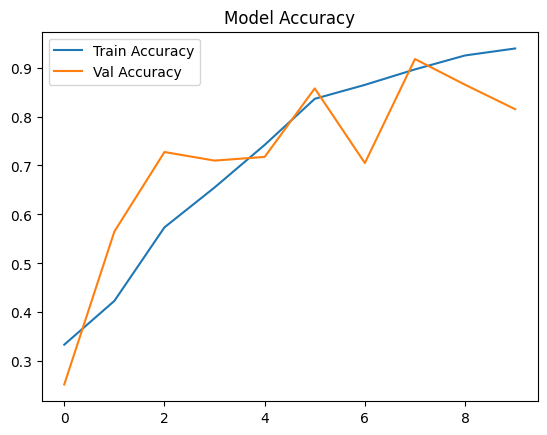

In [25]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()




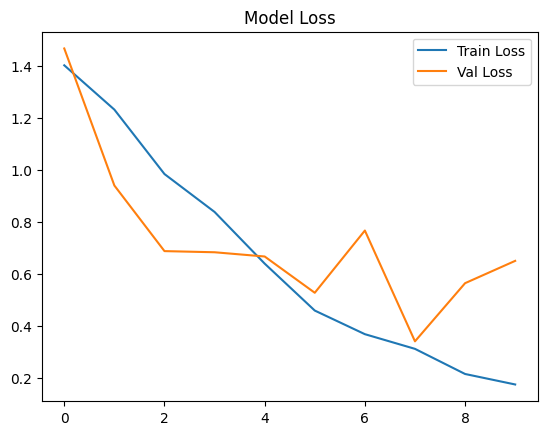

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

## Predict on a New Image

In [27]:
# Upload a new image
from google.colab import files
uploaded = files.upload()


Saving crt.jpg to crt.jpg


In [28]:
#  Load and Preprocess the Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace with your actual image file name
img_path = list(uploaded.keys())[0]

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize


In [29]:
# Predicting the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [30]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())

print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: phoma


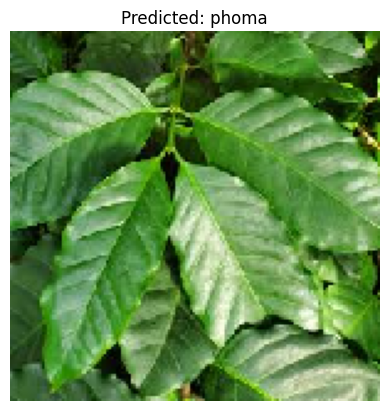

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.show()


In [32]:
from google.colab import files
upload = files.upload()

Saving cup.webp to cup.webp
